In [4]:
import matplotlib
import pandas as pd
import seaborn as sns
import math
import statistics
import numpy as np

sns.set(color_codes=True)
energy = pd.read_csv('Electricity Total energy consumption.csv')
energy.info()
energy

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country or Area          370 non-null    object 
 1   Commodity - Transaction  370 non-null    object 
 2   Year                     368 non-null    float64
 3   Unit                     368 non-null    object 
 4   Quantity                 368 non-null    float64
 5   Quantity Footnotes       115 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.5+ KB


,Country or Area,Commodity - Transaction,Year,Unit,Quantity,Quantity Footnotes
0,Algeria,Electricity - Final energy consumption,2018.0,"Kilowatt-hours, million",58153.0,NaN
1,Algeria,Electricity - Final energy consumption,2017.0,"Kilowatt-hours, million",56376.0,NaN
2,Algeria,Electricity - Final energy consumption,2016.0,"Kilowatt-hours, million",52288.0,NaN
3,Algeria,Electricity - Final energy consumption,2015.0,"Kilowatt-hours, million",50153.0,NaN
4,Algeria,Electricity - Final energy consumption,2014.0,"Kilowatt-hours, million",45751.0,NaN
...,...,...,...,...,...,...
365,Zimbabwe,Electricity - Final energy consumption,2012.0,"Kilowatt-hours, million",7831.0,NaN
366,Zimbabwe,Electricity - Final energy consumption,2011.0,"Kilowatt-hours, million",8043.0,NaN
367,Zimbabwe,Electricity - Final energy consumption,2010.0,"Kilowatt-hours, million",7368.0,NaN
368,fnSeqID,Footnote,NaN,NaN,NaN,NaN


No handles with labels found to put in legend.
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Country or Area', ylabel='Quantity'>

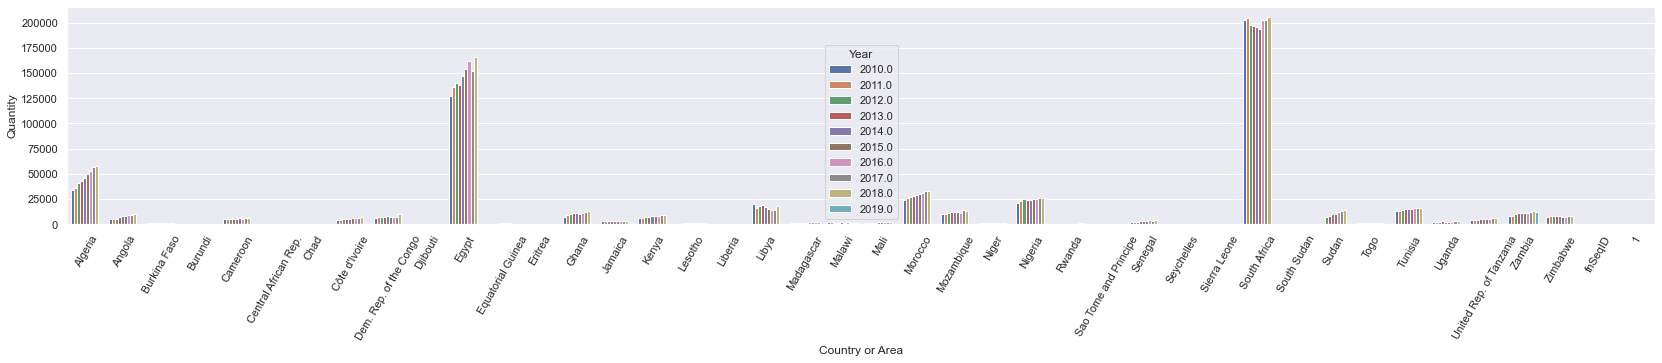

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
energy = pd.read_csv('Electricity Total energy consumption.csv')
 
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*60+2*m
margin = m/plt.gcf().get_size_inches()[0]
plt.xticks(rotation=60)

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])
   

plt.legend(loc= "lower right")
sns.barplot(energy['Country or Area'],energy['Quantity'], energy['Year'])

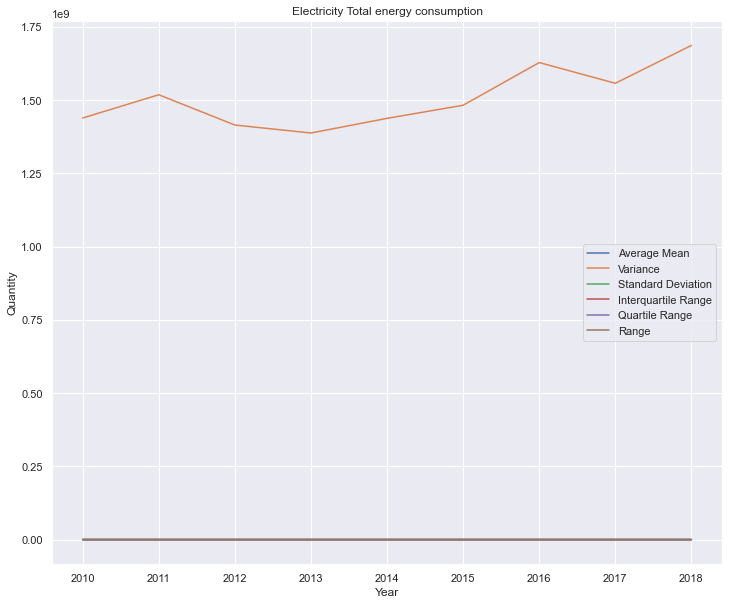

In [13]:
plt.figure(figsize=(12,10))

def interquartile_range(sample):
    q3, q1 = np.percentile(sample, [75 ,25])
    return q3 - q1

def quartile_range(sample):
    q3, q1 = np.percentile(sample, [75 ,25])
    return (q3 - q1)/2

def _range(sample):
    return sample.max() - sample.min()

def create_plot(fn, label):
    ls = []
    for year in range(2010,2019):
            ls.append(fn(energy[energy['Year'] == year]['Quantity']))
              
    plt.plot(range(2010,2019), ls, label=label)
    plt.title('Electricity Total energy consumption')
    plt.ylabel('Quantity')
    plt.xlabel('Year')
    
create_plot(statistics.mean, 'Average Mean')
create_plot(statistics.variance, 'Variance')
create_plot(statistics.stdev, 'Standard Deviation')
create_plot(interquartile_range, 'Interquartile Range')
create_plot(quartile_range, 'Quartile Range')
create_plot(_range, 'Range')

plt.legend(loc='best')